In [1]:
import random as rd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from random import sample


In [2]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])

#Visualize first your dataset and then write the Kmean algorithm

In [3]:
dataset.head()

,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


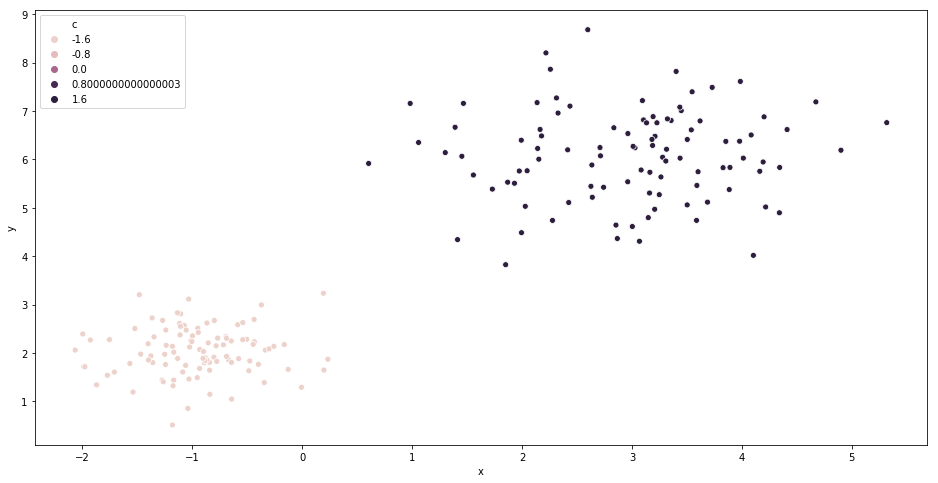

In [4]:
plt.figure(figsize=(16,8))
sns.scatterplot(x="x",y="y",hue="c",data=dataset)

In [9]:
# OOP implementation
class Kmeans():
    def __init__(self,data,k):
        self.data = data
        self.k = k
    
    def init_clusters(self):
        m = self.data.shape[0]
        n = self.data.shape[1]
        #get k random indicies 
        rand = sample(range(m),self.k)
        # use the k random indicies to index into our data for k random points as our centroids
        centers = self.data[rand].reshape(self.k,n)
        # initialize placeholders for the distance matrix and the classes (clusters)
        distance = np.zeros((m,self.k))
        classes = np.ones((m,1))*-1

        return centers,distance,classes

    # calculate the distance between all the points in the data and the centroids
    def get_distance(self,distance,data,centers):
        for i in range(self.k):
            distance[:,i] = np.linalg.norm(data-centers[i].reshape(-1),axis=1)
        return distance
    
    
    def fit(self):
        centers,distance,classes = self.init_clusters()
        while True:
            distance = self.get_distance(distance,self.data,centers)
            old_classes = classes
            classes = np.argmin(distance,axis=1)
            check = (old_classes==classes)
            # check whether the clusters has changed from the last iteration, if True then we have converged.
            if check.all():
                return centers,classes

            for i in range(self.k):
                points = self.data[classes==i]
                center = np.mean(points,axis=0)
                centers[i]=center


In [6]:
# Function implementation
# data: the training examples of shape (m,n)

def k_means(data,k):
    m = data.shape[0]
    n = data.shape[1]
    #get k random indicies 
    rand = sample(range(m),k)
    # use the k random indicies to index into our data for k random points as our centroids
    centers = data[rand].reshape(k,n)
    # initialize placeholders for the distance matrix and the classes (clusters)
    distance = np.zeros((m,k))
    classes = np.ones((m,1))*-1
    while True:
        # calculate the distance between all the points in the data and the centroids
        for i in range(k):
            distance[:,i] = np.linalg.norm(data-centers[i].reshape(-1),axis=1)
        old_classes = classes
        # Use np.argmin to get the index of the closest center to each point
        classes = np.argmin(distance,axis=1)
        check = (old_classes==classes)
        # check whether the clusters has changed from the last iteration, if True then we have converged.
        if check.all():
            return centers,classes
    
        for i in range(k):
            points = data[classes==i]
            center = np.mean(points,axis=0)
            centers[i]=center
        

In [7]:
# centers, classes = k_means(dataset[["x","y"]].values,2)

In [10]:
centers, classes = Kmeans(data=dataset[["x","y"]].values,k=2).fit() 

In [11]:
print(centers)

[[-0.96029167  2.03459859]
 [ 2.97609444  6.07959093]]


In [12]:
dataset["new_c"] = classes

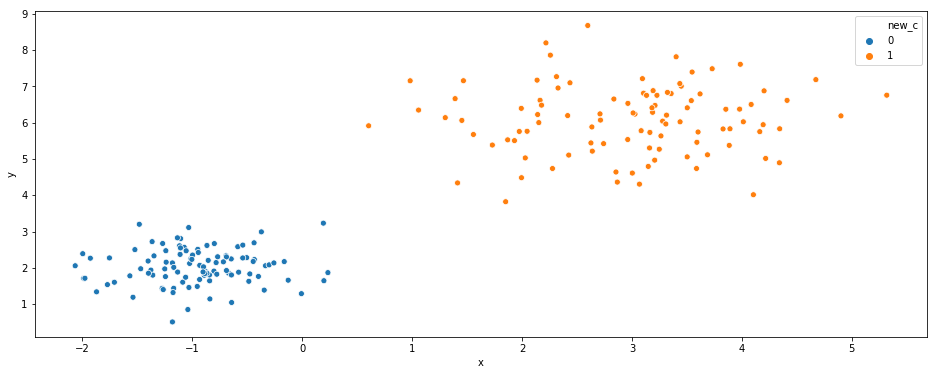

In [13]:
plt.figure(figsize=(16,6))
sns.scatterplot(x="x",y="y",hue="new_c",data=dataset)